In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
df = pd.read_csv("synthetic_data_15000 -Cleaned.csv")
df.head()

In [4]:
X = df.drop(['MI'], axis=1)
y = df['MI']

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
HeartTabNet = TabNetClassifier(n_d=64, n_a=64, n_steps=5,
                               gamma=1.5, n_independent=3, n_shared=3,
                               lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
                               optimizer_fn=torch.optim.Adam,
                               optimizer_params=dict(lr=2e-2),
                               scheduler_params = {"gamma": 0.95,
                                                "step_size": 20},
                               scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15,
                               verbose=1)

d:\Python\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [7]:
epochs = 20

In [8]:
Xtrain, Xtest = Xtrain.values, Xtest.values 
ytrain, ytest = ytrain.values, ytest.values

In [9]:
HeartTabNet.fit(X_train = Xtrain, y_train = ytrain,
                eval_set = [(Xtrain, ytrain), (Xtest, ytest)],
                eval_name = ['train', 'test'],
                max_epochs = epochs, patience=100,
                batch_size=64, virtual_batch_size=16)

epoch 0  | loss: 0.39285 | train_accuracy: 0.97083 | test_accuracy: 0.97    |  0:01:48s
epoch 1  | loss: 0.0512  | train_accuracy: 0.99392 | test_accuracy: 0.995   |  0:02:48s
epoch 2  | loss: 0.03376 | train_accuracy: 0.99708 | test_accuracy: 0.998   |  0:03:41s
epoch 3  | loss: 0.03029 | train_accuracy: 0.99733 | test_accuracy: 0.99733 |  0:04:37s
epoch 4  | loss: 0.02905 | train_accuracy: 0.9975  | test_accuracy: 0.996   |  0:05:35s
epoch 5  | loss: 0.02754 | train_accuracy: 0.99858 | test_accuracy: 0.997   |  0:06:27s
epoch 6  | loss: 0.02546 | train_accuracy: 0.99567 | test_accuracy: 0.996   |  0:07:22s
epoch 7  | loss: 0.02312 | train_accuracy: 0.99767 | test_accuracy: 0.99667 |  0:08:14s
epoch 8  | loss: 0.00989 | train_accuracy: 0.998   | test_accuracy: 0.99767 |  0:09:10s
epoch 9  | loss: 0.0092  | train_accuracy: 0.99667 | test_accuracy: 0.998   |  0:10:06s
epoch 10 | loss: 0.01516 | train_accuracy: 0.99908 | test_accuracy: 0.999   |  0:11:01s
epoch 11 | loss: 0.01012 | train

d:\Python\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


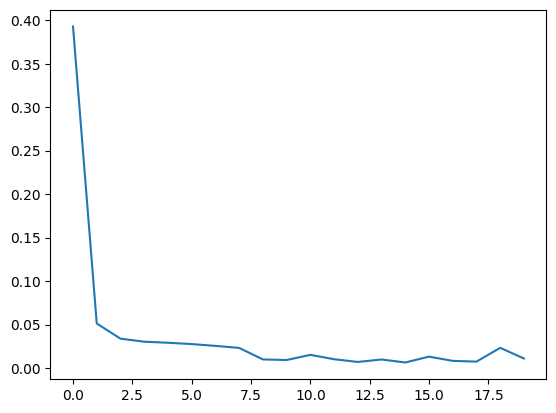

In [10]:
plt.plot(HeartTabNet.history['loss'])

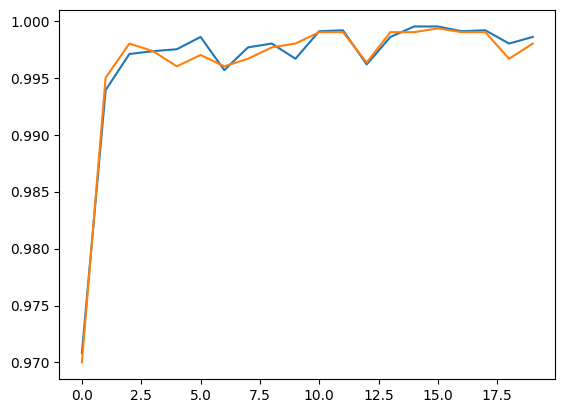

In [11]:
plt.plot(HeartTabNet.history['train_accuracy'])
plt.plot(HeartTabNet.history['test_accuracy'])

In [14]:
with open('heart_tabnet_model.pkl', 'wb') as f:
    pickle.dump(HeartTabNet, f)